## Building Neural networks from scratch


### importing dependencies

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from utils import dictionary_to_vector, vector_to_dictionary

### building a toy dataset

In [2]:
X = np.random.randn(2,50)
y = X[0,:] * 8 + X[1,:] * 5 + 3
X, y

(array([[-0.15445452,  0.83154318,  2.0728488 , -0.37102762, -1.23700267,
          0.15084809,  1.07437049,  0.389892  ,  0.24587981,  0.01923836,
         -0.36302213,  1.43183396, -0.97658554,  0.24353903,  1.93555428,
          0.44132968, -0.02499639, -0.01399742,  0.27899477,  0.01514156,
         -0.57083296,  0.29148321,  1.71661739, -0.08947676, -0.35480035,
         -0.48826163,  0.41735051,  0.18081891, -0.48615749, -0.21131276,
          0.16429018,  0.65112944,  0.0497898 , -1.17768797,  1.50140678,
         -0.23276968,  0.18226407,  0.59071988, -0.97367054, -0.21204215,
          2.03020037,  0.75542303,  1.83982724, -0.26781813, -1.44110227,
         -0.98866341, -0.73952247,  2.42571549, -0.27243226, -1.07318933],
        [-0.17710679, -1.17093728,  0.48564779, -0.57838979,  0.40814509,
          0.53552024, -0.25831961, -1.08294258,  0.69435179,  0.24223764,
         -0.2649135 , -0.04914271, -0.96698384, -1.34092156, -0.92284302,
         -0.04475115,  1.19101619, -0

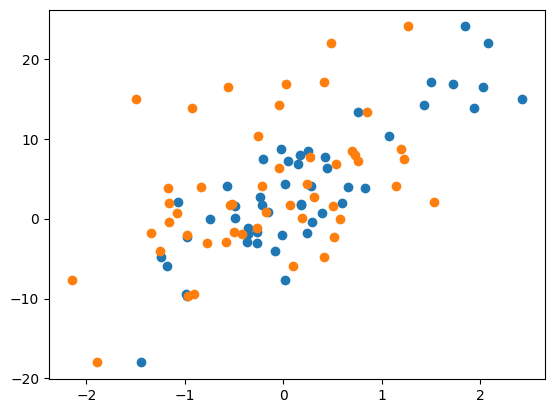

In [3]:
plt.scatter(x=X[0,:],y=y)
plt.scatter(x=X[1,:],y=y)

### Building neural network with one hidden layer

In [4]:
def initialize_parameters(n_in, n_h, n_out):
    """
    initializes model parameters.

    Arguments:
    n_in: number of input units
    n_h: number of hidden units
    n_out: number of output units

    Return:
    parameters: dictionary of all the randomly intialized parameters
    
    """

    np.random.seed(42)

    W1 = np.random.rand(n_h, n_in)
    b1 = np.random.rand(n_h, 1)
    W2 = np.random.rand(n_out, n_h)
    b2 = np.random.rand(n_out, 1)

    parameters = {"W1":W1,
                  "b1":b1,
                  "W2":W2,
                  "b2":b2}
    
    return parameters

In [5]:
def forward_propagation(X, parameters):
    """
    Arguments:
    X: input data of shape (n_x, m)
    parameters: randomly initialized model parameters

    Return:
    A2 = sigmoid output of second activation
    cache = dictionary of Z1, A1, Z2 and A2
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Forward pass
    Z1 = W1 @ X
    A1 = np.tanh(Z1)
    Z2 = W2 @ A1
    A2 = Z2

    cache = {"Z1":Z1,
             "A1":A1,
             "Z2":Z2,
             "A2":A2}

    return A2, cache

In [6]:
def compute_loss(A2, Y):
    """
    compute Mean Squared Error loss of the model
    Arguments:
    A2: Prediction of the model
    Y: "true" label vactor of shape (1, number of samples)

    Return:
    loss: computed scalar loss of the model
    """

    m = len(Y)
    loss = 1/m * np.sum((A2 - Y) ** 2)
    return loss

In [7]:
def backward_propagation(parameters, cache, X, Y):
    """ computes gradient of the model parameters
    
    Arguments:
    parameters: dictionary of the parameters of the model
    cache: a dictionary containing Z1, A1, Z2 and A2
    X: input data of shape (2, number of example)
    Y: "true" label vector of shape (1, number of example)
    
    Return:
    grad: dictionary of the gradients of each model parameters
    """

    m = len(Y)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = cache["Z1"]
    A1 = cache["A1"]
    Z2 = cache["Z2"]
    A2 = cache["A2"]

    # Backpropagation
    dA2 = (2/m) * (A2 - Y) # (1, m)
    dZ2 = dA2 # (1,m)
    dW2 = dZ2 @ A1.T #(1, n_h)
    db2 = np.sum(dZ2, axis=1, keepdims=True) # (1,1)
    dA1 = W2.T @ dZ2 # (n_h, m)
    dZ1 = dA1 * (1 - np.power(A1,2)) # (n_h, m)
    dW1 = dZ1 @ X.T # (n_h, n_in)
    db1 = np.sum(dZ1, axis=1, keepdims=True) # (1, n_h)

    grads = {"dW1":dW1,
            "db1":db1,
            "dW2":dW2,
            "db2":db2}

    return grads

In [8]:
parameters = initialize_parameters(2, 4, 1)
parameters

{'W1': array([[0.37454012, 0.95071431],
        [0.73199394, 0.59865848],
        [0.15601864, 0.15599452],
        [0.05808361, 0.86617615]]),
 'b1': array([[0.60111501],
        [0.70807258],
        [0.02058449],
        [0.96990985]]),
 'W2': array([[0.83244264, 0.21233911, 0.18182497, 0.18340451]]),
 'b2': array([[0.30424224]])}

In [9]:
A2, cache = forward_propagation(X, parameters)
A2

array([[-0.26988161, -0.71974637,  1.06407202, -0.72858338, -0.15856461,
         0.61272156,  0.24191956, -0.8156822 ,  0.77021717,  0.27310983,
        -0.45539756,  0.58724467, -1.08109658, -0.98808176, -0.05840162,
         0.17163018,  0.9753883 , -0.87705297, -0.10158695, -1.21943056,
         0.78974115, -0.88981288,  0.73874493, -1.02793659, -0.59815746,
         0.29630329,  0.48797083, -0.46197178, -0.04060418,  0.94338853,
         0.76579531, -0.53827709,  0.74583535, -0.44978826,  0.9324431 ,
         0.22259495, -0.4814297 , -0.79433164,  0.07079622, -0.02795639,
         0.33963619,  0.99629098,  1.23629429, -0.63336238, -1.28317027,
        -1.06262869,  0.25544886, -0.36734168, -0.83004361,  0.8494613 ]])

In [10]:
loss = compute_loss(A2, y)
loss

73.10354370802223

In [11]:
grads = backward_propagation(parameters=parameters, cache=cache, X=X, Y=y)
grads

{'dW1': array([[-6.44123072,  0.3084009 ],
        [-0.95336668, -0.14148202],
        [-2.29437842, -0.62519302],
        [-1.65365872, -0.23898093]]),
 'db1': array([[-4.34631075],
        [-0.8841663 ],
        [-1.29004062],
        [-1.06099816]]),
 'dW2': array([[-5.82259712, -8.19195815, -2.70425091, -3.11902552]]),
 'db2': array([[-7.40504325]])}

In [14]:

def check_grads(parameters=parameters, grads=grads):
    """
    check the calculated gradients are correct
    """
    eps = 0.00000001
    params_theta = {}

    
    # convert parameter dictionary to a single vector
    param_vector = dictionary_to_vector(parameters=parameters)
    print(param_vector)
    # convert vector to dictionary
    param_dictionary = vector_to_dictionary(vector=param_vector, parameters=parameters)
    print(param_dictionary)

check_grads(parameters = parameters, grads=grads)

[0.3745401188473625, 0.9507143064099162, 0.7319939418114051, 0.5986584841970366, 0.15601864044243652, 0.15599452033620265, 0.05808361216819946, 0.8661761457749352, 0.6011150117432088, 0.7080725777960455, 0.020584494295802447, 0.9699098521619943, 0.8324426408004217, 0.21233911067827616, 0.18182496720710062, 0.18340450985343382, 0.3042422429595377]


AttributeError: 'list' object has no attribute 'reshape'

In [ ]:
## manual gradient check
## lets check the gradient calculation of W1[0][0]
## making a copy of parameters
import copy

check_params = copy.deepcopy(parameters)

## nudging the W[0][0] parameter by 0.00000001
check_params["W1"][0][0] = check_params["W1"][0][0] + 0.00000001

## forward pass and loss
check_A2, check_cache = forward_propagation(parameters=check_params, X=X)
check_loss = compute_loss(A2=check_A2, Y=y)

# manually computing gradient of parameter W[0][0]
gradient = (check_loss - loss)/ 0.00000001

print(f"Numerically approximated gradient of the parameter W[0][0] is:{gradient}")
print(f"Gradient of W[0][0] calculated by backprop: {grads['dW1'][0][0]}")
print(gradient - grads['dW1'][0][0])

In [ ]:
parameters

In [ ]:
loss, check_loss